In [1]:
#RAYAAN AGARWAL(c0887055)

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
# Loading the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


In [4]:
# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Data preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Reshaping the data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
# Splitting train data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

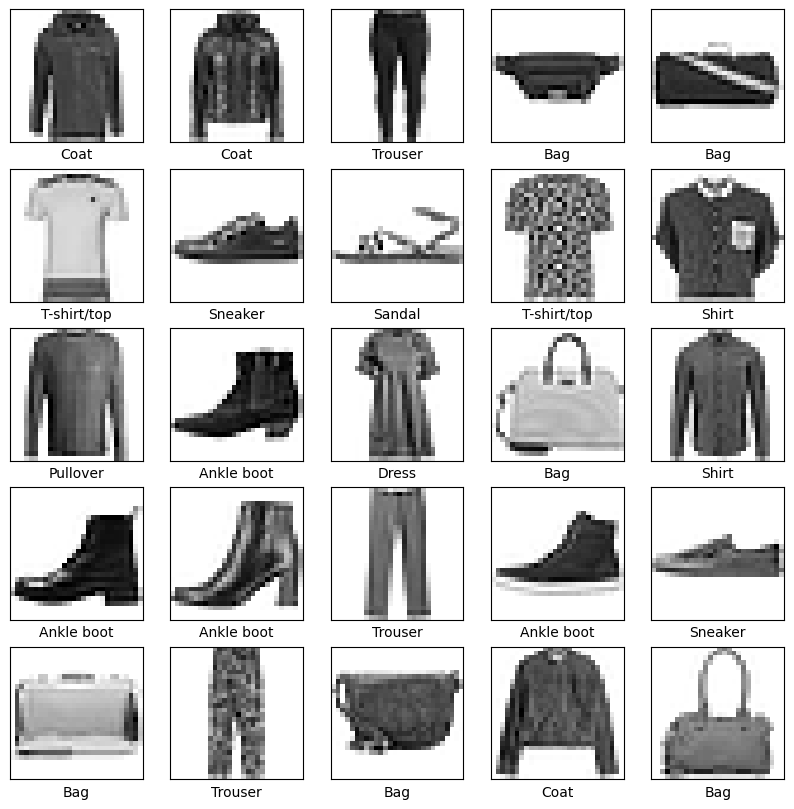

In [8]:
# Visualizations to understand classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

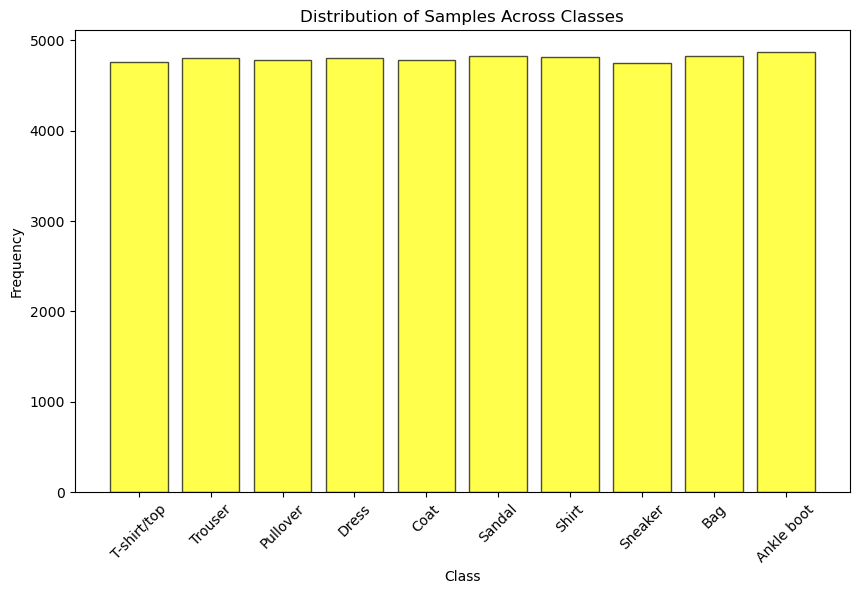

In [11]:
# Bar chart showing the distribution of samples across different classes mentioned above
plt.figure(figsize=(10, 6))
plt.hist(train_labels, bins=np.arange(11)-0.5, rwidth=0.8, color='yellow', edgecolor='black', alpha=0.7)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Samples Across Classes')
plt.show()


In [12]:
# Build an ANN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\rayaa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8099 - loss: 0.5381 - val_accuracy: 0.8786 - val_loss: 0.3396
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8979 - loss: 0.2812 - val_accuracy: 0.9007 - val_loss: 0.2737
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9187 - loss: 0.2261 - val_accuracy: 0.9043 - val_loss: 0.2697
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9305 - loss: 0.1898 - val_accuracy: 0.9018 - val_loss: 0.2705
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9385 - loss: 0.1646 - val_accuracy: 0.9092 - val_loss: 0.2557


In [15]:
# training process
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

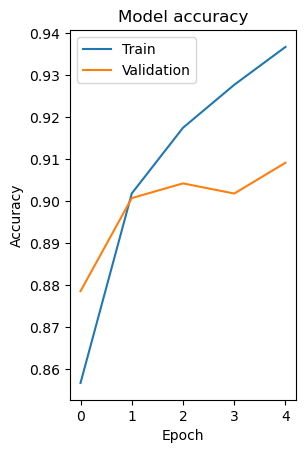

In [16]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

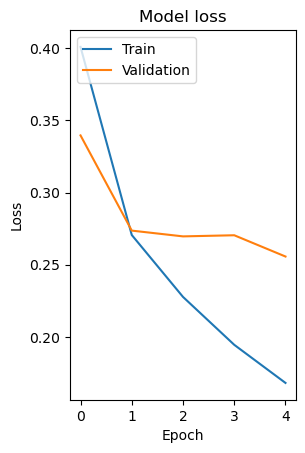

In [17]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9106 - loss: 0.2707

Test accuracy: 0.9122999906539917


In [19]:
# Test set prediction
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


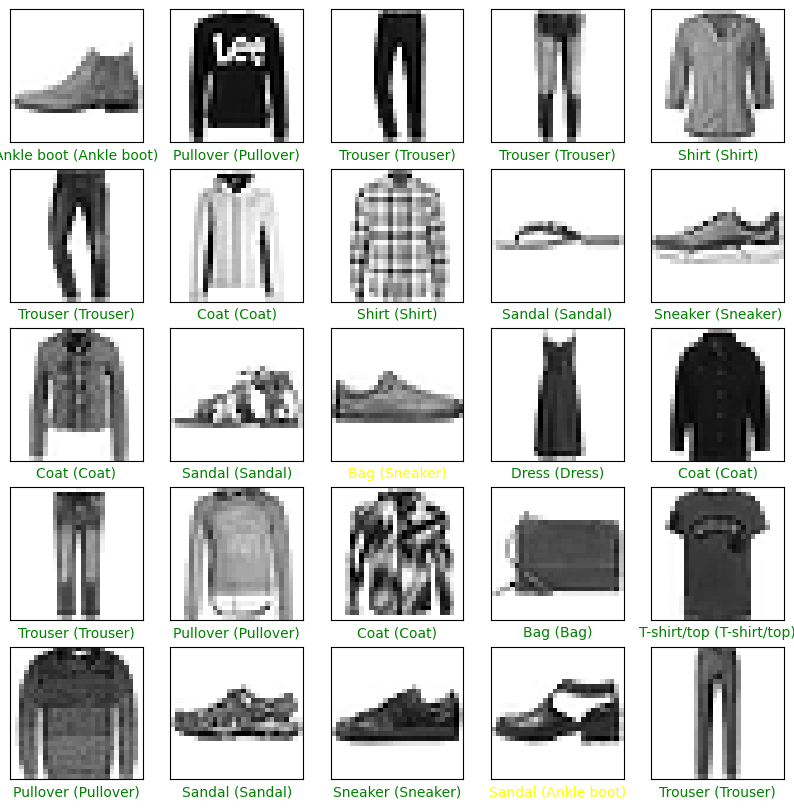

In [21]:
# Display sample predictions along with corresponding images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'yellow'
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)
plt.show()